In [1]:
# importing pandas
import pandas as pd
#importing numpy
import numpy as np
#importing matplotlib
import matplotlib.pyplot as plt
#importing seaborn
import seaborn as sb

In [3]:
df = pd.read_csv('Concrete_data.csv')
df

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Cement              1030 non-null   float64
 1   Blast Furnace Slag  1030 non-null   float64
 2   Fly Ash             1030 non-null   float64
 3   Water               1030 non-null   float64
 4   Superplasticizer    1030 non-null   float64
 5   Coarse Aggregate    1030 non-null   float64
 6   Fine Aggregate      1030 non-null   float64
 7   Age                 1030 non-null   int64  
 8   Strength            1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [5]:
df.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [6]:
df.isnull().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

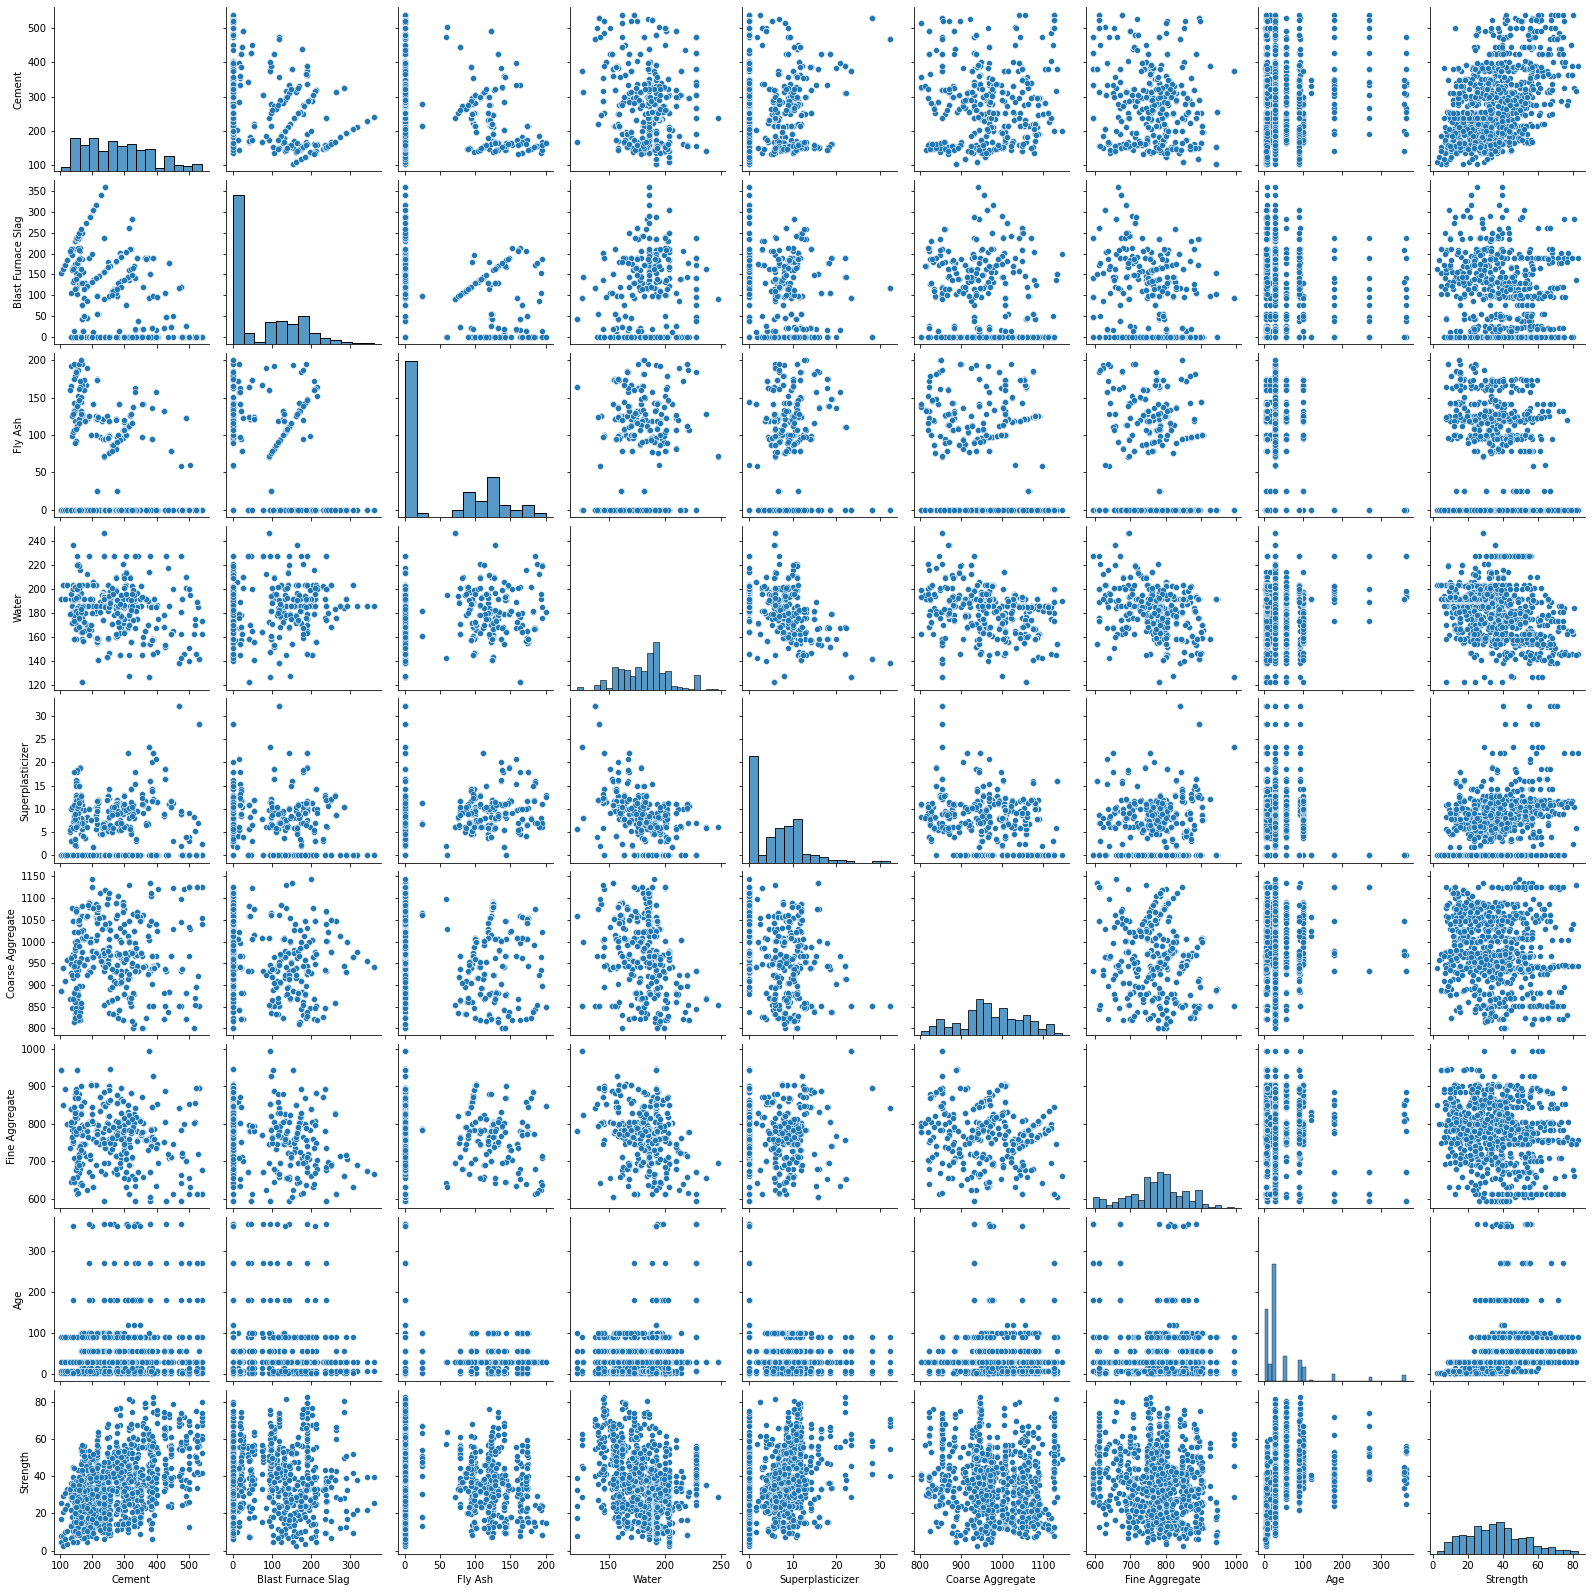

In [7]:
# pairplot of dataframe
sb.pairplot( df )

Text(0.5, 0, 'Cement')

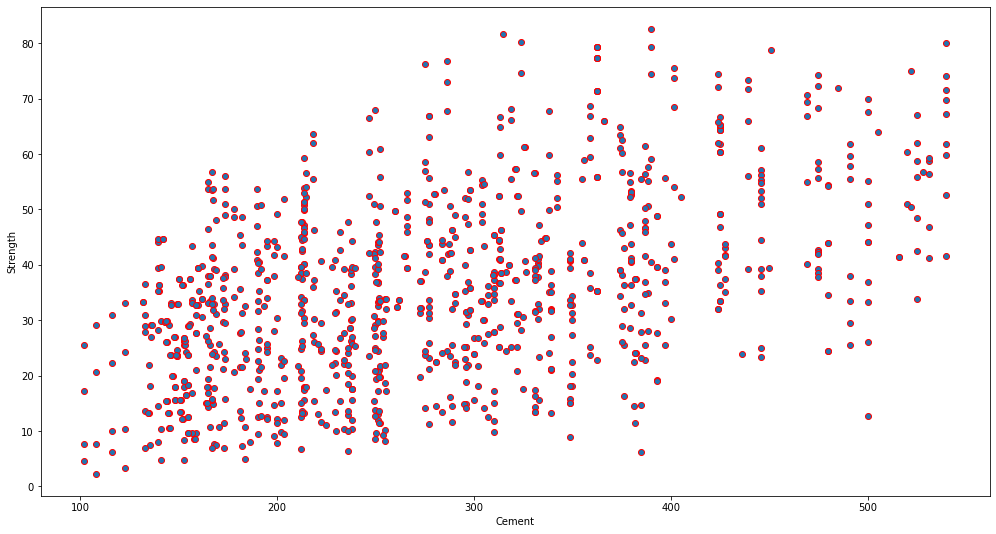

In [9]:
# scatter plot of Water and Cement
plt.figure(figsize=[17,9])
plt.scatter(y='Strength',x='Cement',edgecolors='red',data=df)
plt.ylabel('Strength')
plt.xlabel('Cement')

Text(0.5, 0, 'Fly Ash')

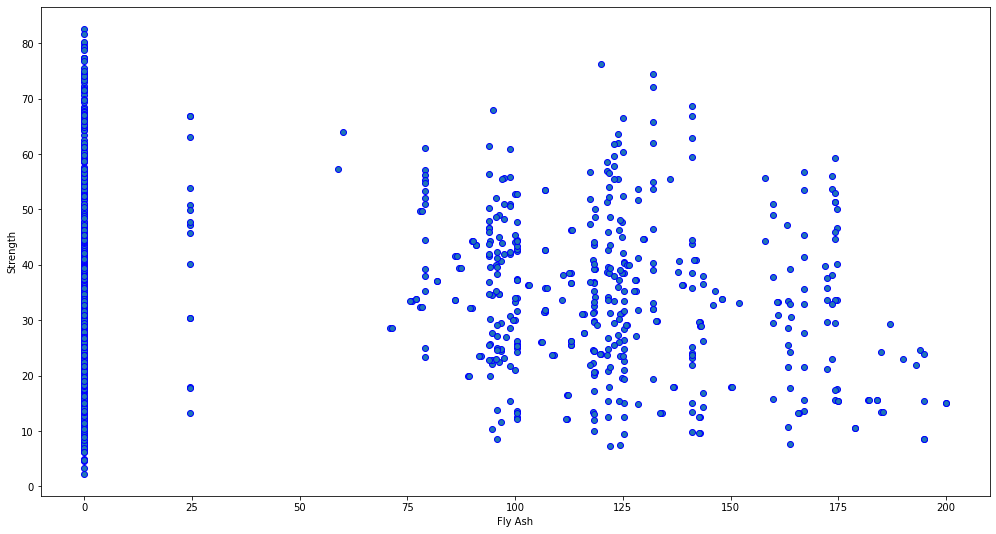

In [11]:
plt.figure(figsize=[17,9])
plt.scatter(y='Strength',x='Fly Ash',edgecolors='blue',data=df)
plt.ylabel('Strength')
plt.xlabel('Fly Ash')

<AxesSubplot:>

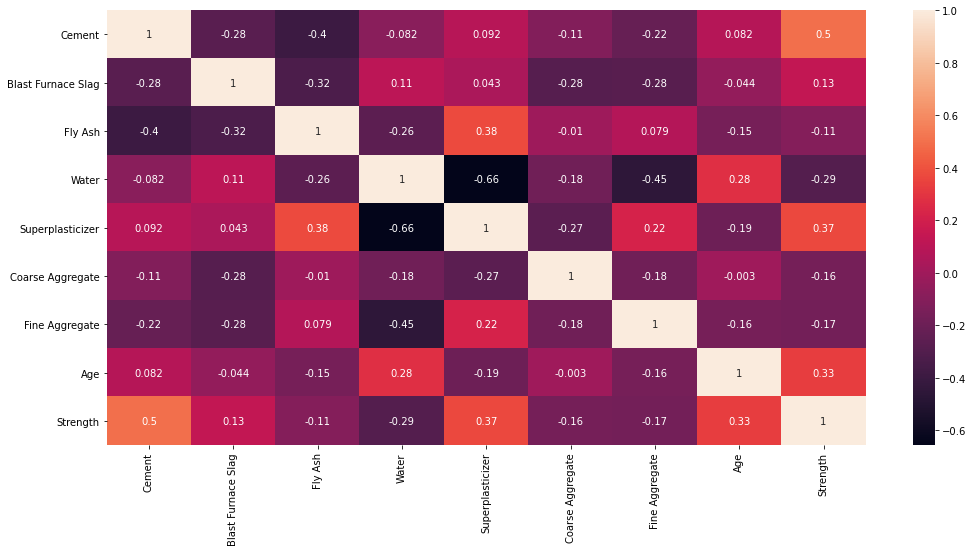

In [13]:
plt.figure(figsize=[17,8])

#ploting correlation plot

sb.heatmap(df.corr(),annot=True)

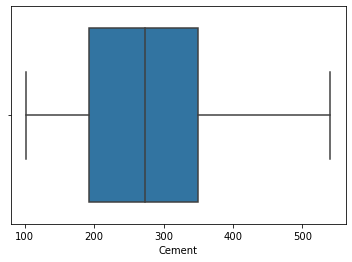

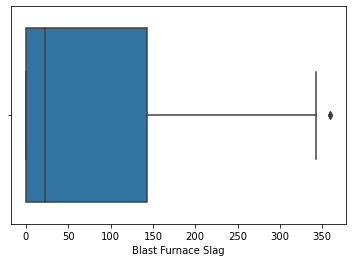

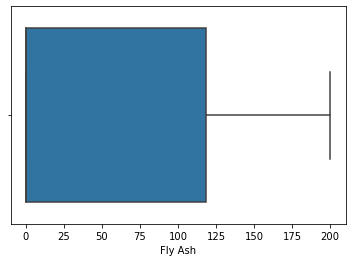

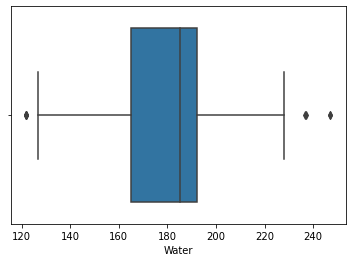

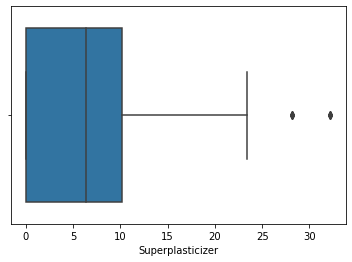

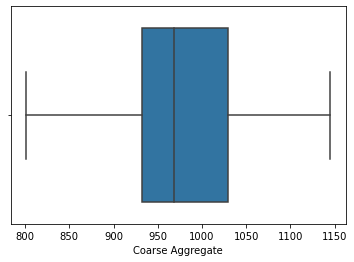

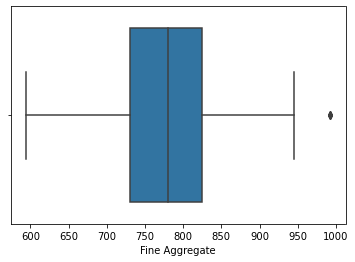

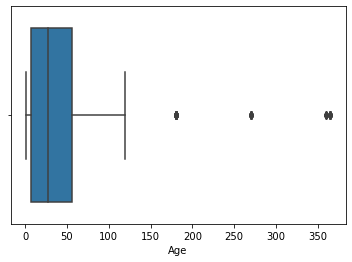

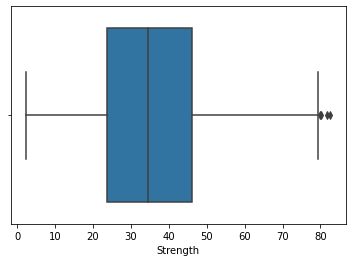

In [19]:
l=['Cement','Blast Furnace Slag','Fly Ash','Water','Superplasticizer','Coarse Aggregate','Fine Aggregate','Age','Strength']
for i in l:
    sb.boxplot(x=df[i])
    plt.show()

In [21]:
# independent variables
x = df.drop(['Strength'],axis=1)
# dependent variables
y = df['Strength']

In [22]:
# importing train_test_split
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest= train_test_split(x,y,test_size=0.3,random_state=42)

In [23]:
from sklearn.preprocessing import StandardScaler
stand= StandardScaler()
Fit = stand.fit(xtrain)
xtrain_scl = Fit.transform(xtrain)
xtest_scl = Fit.transform(xtest)

In [25]:
# import linear regression models
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
lr=LinearRegression()
fit=lr.fit(xtrain_scl,ytrain)
score = lr.score(xtest_scl,ytest)
print('predcted score is : {}'.format(score))
print('..................................')
y_predict = lr.predict(xtest_scl)
print('mean_sqrd_error is ==',mean_squared_error(ytest,y_predict))
rms = np.sqrt(mean_squared_error(ytest,y_predict)) 
print('root mean squared error is == {}'.format(rms))

predcted score is : 0.5943782479239207
..................................
mean_sqrd_error is == 109.75080797014398
root mean squared error is == 10.47620198211852


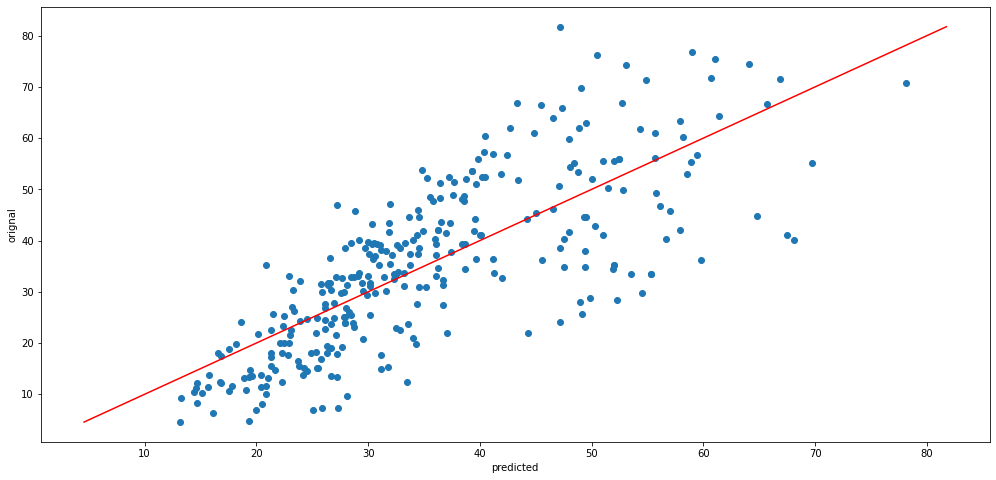

In [26]:
plt.figure(figsize=[17,8])
plt.scatter(y_predict,ytest)
plt.plot([ytest.min(), ytest.max()], [ytest.min(), ytest.max()], color='red')
plt.xlabel('predicted')
plt.ylabel('orignal')
plt.show()

In [27]:
# import rigd and lasso regresion
from sklearn.linear_model import Ridge,Lasso
from sklearn.metrics import mean_squared_error
rd= Ridge(alpha=0.4)
ls= Lasso(alpha=0.3)
fit_rd=rd.fit(xtrain_scl,ytrain)
fit_ls = ls.fit(xtrain_scl,ytrain)
print('score od ridge regression is:-',rd.score(xtest_scl,ytest))
print('.......................................................')
print('score of lasso is:-',ls.score(xtest_scl,ytest))
print('mean_sqrd_roor of ridig is==',mean_squared_error(ytest,rd.predict(xtest_scl)))
print('mean_sqrd_roor of lasso is==',mean_squared_error(ytest,ls.predict(xtest_scl)))
print('root_mean_squared error of ridge is==',np.sqrt(mean_squared_error(ytest,rd.predict(xtest_scl))))
print('root_mean_squared error of lasso is==',np.sqrt(mean_squared_error(ytest,lr.predict(xtest_scl))))

score od ridge regression is:- 0.5946771295476774
.......................................................
score of lasso is:- 0.5892480040172353
mean_sqrd_roor of ridig is== 109.66993829408042
mean_sqrd_roor of lasso is== 111.13891995122191
root_mean_squared error of ridge is== 10.472341586010286
root_mean_squared error of lasso is== 10.47620198211852


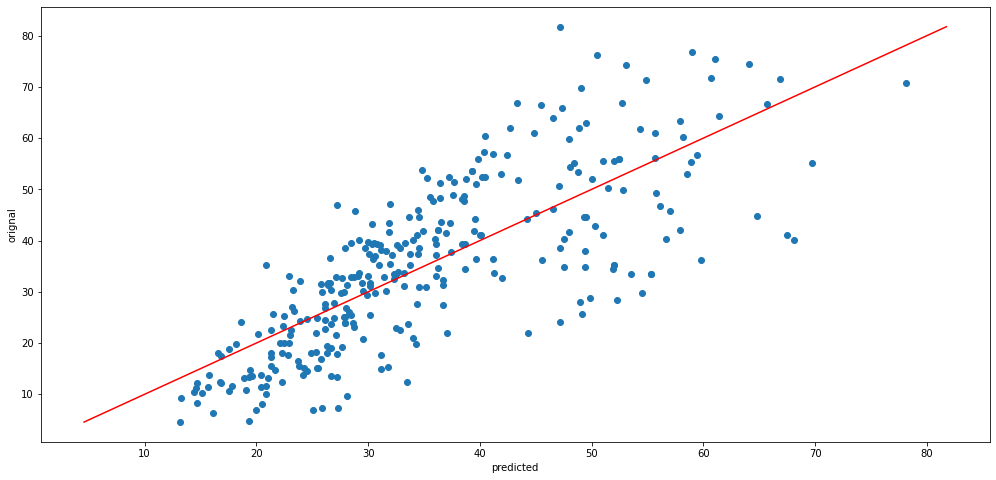

In [28]:
plt.figure(figsize=[17,8])
plt.scatter(y_predict,ytest)
plt.plot([ytest.min(), ytest.max()], [ytest.min(), ytest.max()], color='red')
plt.xlabel('predicted')
plt.ylabel('orignal')
plt.show()

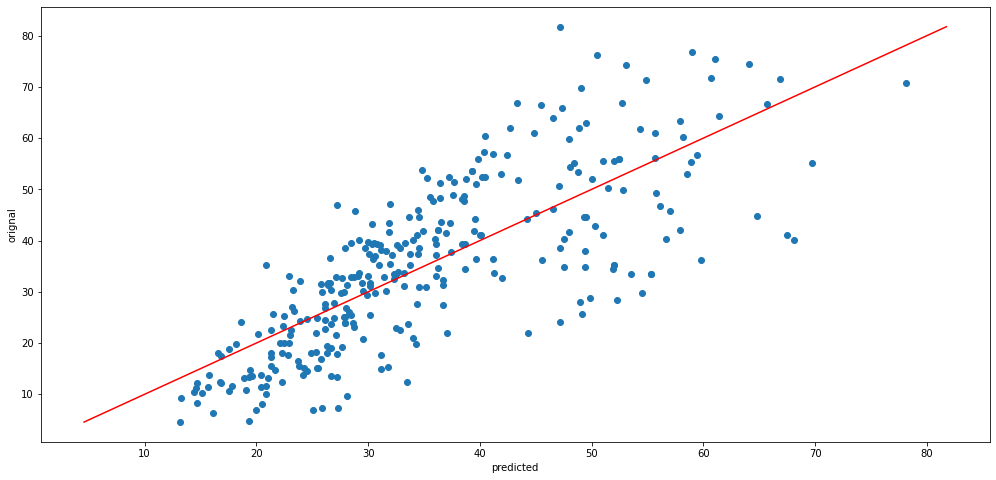

In [29]:
plt.figure(figsize=[17,8])
plt.scatter(y_predict,ytest)
plt.plot([ytest.min(), ytest.max()], [ytest.min(), ytest.max()], color='red')
plt.xlabel('predicted')
plt.ylabel('orignal')
plt.show()

In [30]:
# import random forest regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
rnd= RandomForestRegressor(ccp_alpha=0.0)
fit_rnd= rnd.fit(xtrain_scl,ytrain)
print('score is:-',rnd.score(xtest_scl,ytest))
print('........................................')
print('mean_sqrd_error is==',mean_squared_error(ytest,rnd.predict(xtest_scl)))
print('root_mean_squared error of is==',np.sqrt(mean_squared_error(ytest,rnd.predict(xtest_scl))))

score is:- 0.8849807119246764
........................................
mean_sqrd_error is== 31.1212594832681
root_mean_squared error of is== 5.578643157907495


In [31]:
x_predict = list(rnd.predict(xtest))
predicted_df = {'predicted_values': x_predict, 'original_values': ytest}
#creating new dataframe
pd.DataFrame(predicted_df).head(20)

,predicted_values,original_values
31,57.7012,52.91
109,60.6804,55.90
136,60.6804,74.50
88,60.6804,35.30
918,54.7910,10.54
1025,60.8079,44.28
870,60.8079,23.69
318,54.7910,45.37
261,54.7910,37.40
535,53.3553,48.85


In [32]:
import pickle
file = 'concrete_strength'
save = pickle.dump(rnd,open(file,'wb'))